In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_CUstomers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.rename(index=str, columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [10]:
# The following bandwidth can be automatically detected using
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [12]:
bandwidth = estimate_bandwidth(X, quantile=0.1)

In [13]:
print(bandwidth)

22.173844534734847


In [14]:
ms = MeanShift(bandwidth=bandwidth).fit(X)

In [15]:
X['Labels'] = ms.labels_

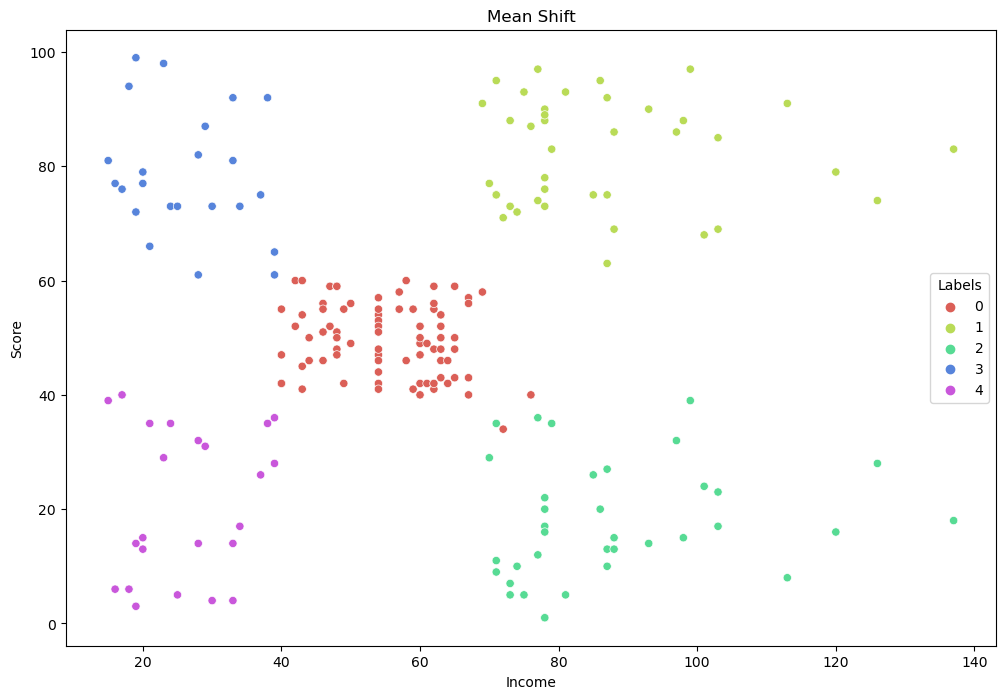

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls',np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('Mean Shift')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=5,linkage='average').fit(X)

In [20]:
X['Labels'] = agglom.labels_

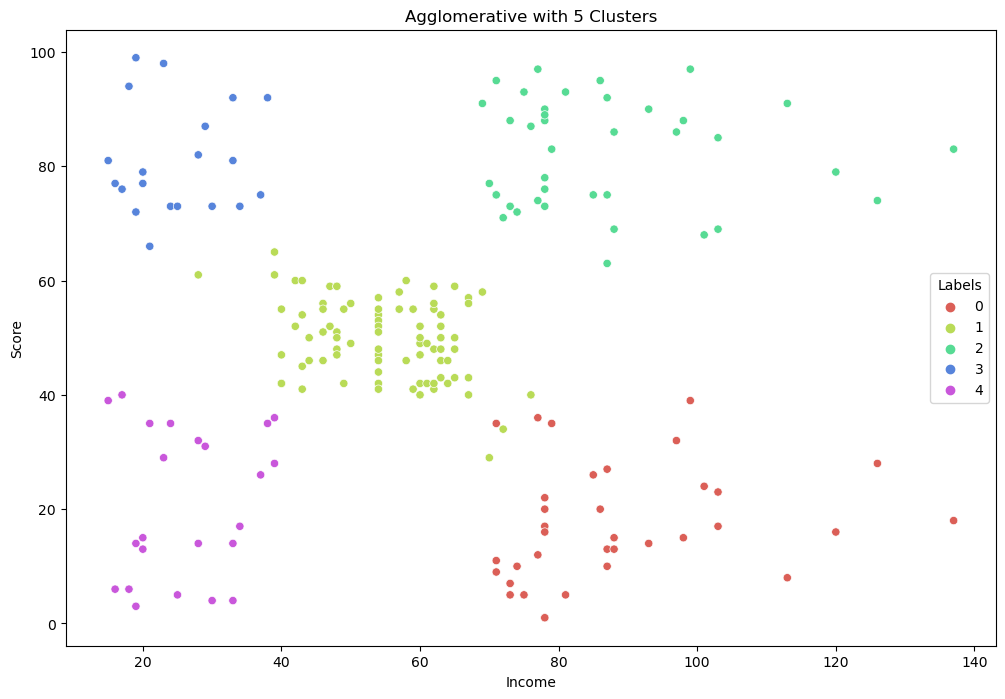

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', 5))
plt.title("Agglomerative with 5 Clusters")
plt.show()